
```
Student ID: 2357572
Student Name: Suraj Kanwar
```



**Exercise:** Build a Neural Network to Recognize Devnagari Handwritten Digits

**Goal:** Create and train a neural network to identify Devnagari digits (0-9) using Python, TensorFlow, and Keras working with images from a dataset, process them, and build a model to classify them.

In [43]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [44]:
# Import necessary libraries
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from PIL import Image
import matplotlib.pyplot as plt

#Task 1: Data Preparation:

* Download the Devnagari digits dataset folder provided.
* Use the Python Imaging Library (PIL) to load the images from the "Train" and "Test" folders.
* Turn the images into numbers (Numpy arrays) and adjust their values to be between 0 and 1 (normalization).
* Resize all images to 28x28 pixels.
* Label each image based on its folder (e.g., "digit_0" = 0, "digit_1" = 1, etc.).
* Convert the labels into a format the model can use (one-hot encoding).

In [45]:
# Task 1: Data Preparation
train_dir = "/content/drive/MyDrive/Artificial Intelligence and Machine Learning/Week:4/Copy of devnagari digit/DevanagariHandwrittenDigitDataset/Train"
test_dir = "/content/drive/MyDrive/Artificial Intelligence and Machine Learning/Week:4/Copy of devnagari digit/DevanagariHandwrittenDigitDataset/Test"
img_size = 28  # 28x28 images

# Function to load images and labels
def load_images(folder):
    images = []
    labels = []
    for digit in range(10):  # Folders named digit_0 to digit_9
        folder_path = os.path.join(folder, f"digit_{digit}")
        for filename in os.listdir(folder_path):
            img_path = os.path.join(folder_path, filename)
            img = Image.open(img_path).convert("L")  # Grayscale
            img = img.resize((img_size, img_size))  # Resize to 28x28
            img = np.array(img) / 255.0  # Normalize to [0, 1]
            images.append(img.flatten())  # Flatten to 784 values
            labels.append(digit)
    return np.array(images), np.array(labels)

# Load training and testing data
x_train, y_train = load_images(train_dir)
x_test, y_test = load_images(test_dir)

# One-hot encode labels
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

print(f"Training data shape: {x_train.shape}")
print(f"Testing data shape: {x_test.shape}")

Training data shape: (17000, 784)
Testing data shape: (3000, 784)


#Task 2: Build the FCN Model

* Make a simple model using Keras’ Sequential style.
* Add 3 hidden layers:
> * First layer: 64 neurons with a sigmoid activation.
> * Second layer: 128 neurons with a sigmoid activation.
> * Third layer: 256 neurons with a sigmoid activation.
* Add an output layer with 10 neurons (one for each digit) and use a softmax activation.


In [46]:
# Task 2: Build the FCN Model
model = models.Sequential([
    layers.Input(shape=(784,)),  # Explicit Input layer
    layers.Dense(64, activation='sigmoid'),
    layers.Dense(128, activation='sigmoid'),
    layers.Dense(256, activation='sigmoid'),
    layers.Dense(10, activation='softmax')
])

# Display model summary
model.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_24 (Dense)                     │ (None, 64)                  │          50,240 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_25 (Dense)                     │ (None, 128)                 │           8,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_26 (Dense)                     │ (None, 256)                 │          33,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_27 (Dense)                     │ (None, 10)                  │           2,570 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 94,154 (367.79 KB)

 Trainable params: 94,154 (367.79 KB)

 Non-trainable params: 0 (0.00 B)

#Task 3: Compile the Model

* Prepare the model for training by picking:
> * An optimizer (like Adam).
> * A loss function (like sparse categorical crossentropy).
> * A metric to track (like accuracy).



In [47]:
# Task 3: Compile the Model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

#Task 4: Train the Model

* Train the model using the model.fit() function.
* Use a batch size of 128 and train for 20 rounds (epochs).
* Set aside 20% of the training data to check progress (validation_split=0.2).
* (Optional) Add tools like ModelCheckpoint to save the best version and EarlyStopping to stop if it’s not improving.

In [55]:
# Task 4: Train the Model with Callbacks
# Define callbacks with .keras format
callbacks = [
    ModelCheckpoint(filepath='best_devnagari_model.keras', monitor='val_loss', save_best_only=True),
    EarlyStopping(monitor='val_loss',
                  patience=4)
]

# Train the model
history = model.fit(
    x_train, y_train,
    batch_size=128,
    epochs=20,
    validation_split=0.2,
    callbacks=callbacks
)

Epoch 1/20
107/107 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.9888 - loss: 0.0477 - val_accuracy: 0.0000e+00 - val_loss: 11.2533
Epoch 2/20
107/107 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.9903 - loss: 0.0406 - val_accuracy: 0.0000e+00 - val_loss: 11.3421
Epoch 3/20
107/107 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.9934 - loss: 0.0303 - val_accuracy: 0.0000e+00 - val_loss: 11.5185
Epoch 4/20
107/107 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.9956 - loss: 0.0257 - val_accuracy: 0.0000e+00 - val_loss: 11.8701
Epoch 5/20
107/107 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.9959 - loss: 0.0208 - val_accuracy: 0.0000e+00 - val_loss: 12.0482


# Task5: Evaluate the Model

* After training, check how well the model works on the test data using model.evaluate().
* Report the test accuracy and loss.

In [49]:
# Task 5: Evaluate the Model
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"Test accuracy: {test_acc:.4f}, Test loss: {test_loss:.4f}")

94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9446 - loss: 0.3696
Test accuracy: 0.7670, Test loss: 2.1480


#Task 6: Save and Load the Model

* Save the trained model as a file (e.g., my_model.h5) using model.save().
* Load it back with load_model() and test it again to make sure it works.

In [53]:
# Task 6: Save and Load the Model
# Save the model
model.save('devnagari_model.keras')

# Load it back
loaded_model = tf.keras.models.load_model('devnagari_model.keras')

# Evaluate
loaded_test_loss, loaded_test_acc = loaded_model.evaluate(x_test, y_test, verbose=0)
print(f"Loaded model test accuracy: {loaded_test_acc:.4f}")

Loaded model test accuracy: 0.7670


#Task 7: Predictions

* Use model.predict() to guess the digits in the test images.
* Turn the model’s guesses (probabilities) into actual digit labels with np.argmax().

In [51]:
# Task 7: Predictions
predictions = model.predict(x_test)
predicted_labels = np.argmax(predictions, axis=1)
true_labels = np.argmax(y_test, axis=1)

# Print the first few predictions
print(f"Predicted label for first image: {predicted_labels[0]}")
print(f"True label for first image: {true_labels[0]}")

94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Predicted label for first image: 0
True label for first image: 0


#Visualization

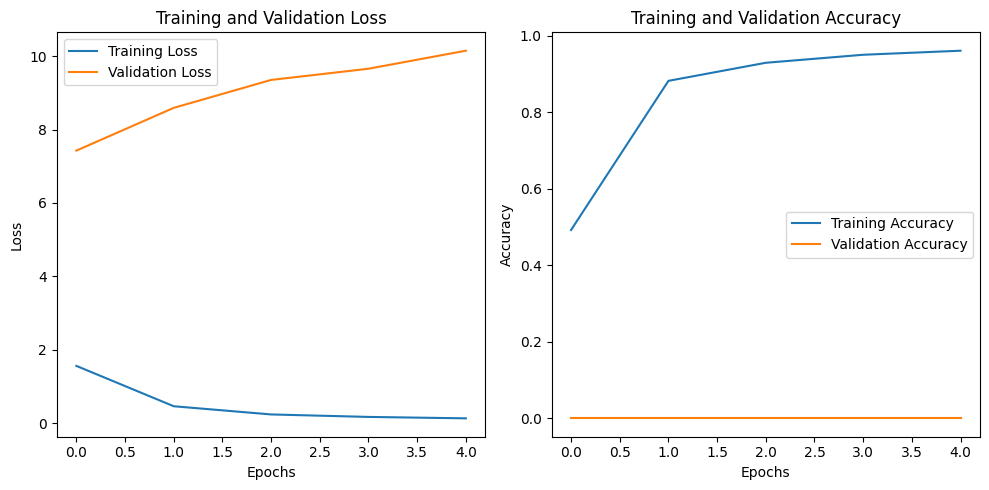

In [52]:
# Visualization: Training and Validation Loss/Accuracy
plt.figure(figsize=(10, 5))

# Plot Loss
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

# Plot Accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.tight_layout()
plt.show()